In [1]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import warnings

# EDA complementario del df `acc_tec_localidad`

In [2]:
acc_tec_localidad = pd.read_csv(r'..\Datasets procesados\acc_tec_localidad_limpio.csv')

In [3]:
acc_tec_localidad.head()

,Provincia,Tecnologia,Accesos
0,Buenos Aires,ADSL,214055.0
1,Buenos Aires,CABLEMODEM,2722466.0
2,Buenos Aires,DIAL UP,5900.0
3,Buenos Aires,FIBRA OPTICA,1849476.0
4,Buenos Aires,OTROS,56102.0


## 1. Revisión general de los datos

In [4]:
acc_tec_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   165 non-null    object 
 1   Tecnologia  165 non-null    object 
 2   Accesos     165 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.0+ KB


In [5]:
print(acc_tec_localidad.describe())

            Accesos
count  1.650000e+02
mean   7.003701e+04
std    2.755185e+05
min    1.000000e+00
25%    1.870000e+02
50%    9.509000e+03
75%    4.428600e+04
max    2.722466e+06


### Conclusiones

1. **Distribución General de los Accesos**:
   - El DataFrame contiene **165 registros** de accesos distribuidos por provincia y tecnología.
   - El número promedio de accesos por registro es de **70,037**, con un valor mínimo de **1** y un máximo de **2,722,466**.

2. **Rango de Variación**:
   - Existe una gran dispersión en los datos, como lo indica la desviación estándar de **275,518**. Esto sugiere que hay una desigualdad significativa en los accesos según la provincia y la tecnología.

3. **Mediana de Accesos**:
   - La mediana es de **9,509 accesos**, lo que indica que más de la mitad de los registros tienen valores por debajo de este número. Esto sugiere que hay registros con valores extremadamente altos que están afectando el promedio.

4. **Distribución Percentil**:
   - El **25%** de los registros tienen menos de **187 accesos**, mientras que el **75%** tienen menos de **44,286 accesos**. Esto refuerza la idea de que hay unas pocas combinaciones provincia-tecnología que concentran la mayor parte de los accesos.

## 2. Distribución de accesos por tecnología
Analizar cuántos accesos corresponden a cada tecnología.
Identificar la tecnología predominante a nivel general.

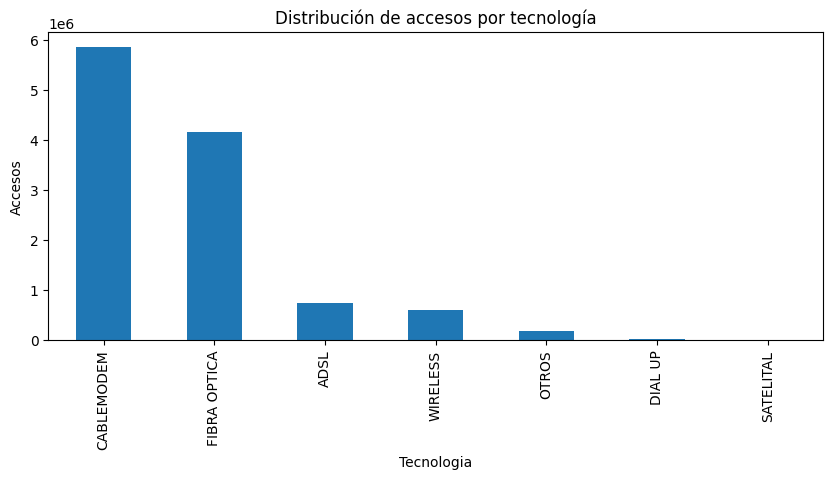

In [6]:
# Distribución de accesos por tecnología
acc_tecnologia = acc_tec_localidad.groupby('Tecnologia')['Accesos'].sum().sort_values(ascending=False)
acc_tecnologia.plot(kind='bar', figsize=(10, 4), title='Distribución de accesos por tecnología')
plt.ylabel('Accesos')
plt.show()


### Conclusiones

1. **Dominio del Cablemodem**:
   - El cablemodem es claramente la tecnología predominante, con el mayor número de accesos, superando los **5 millones**. Esto indica que es la opción preferida en la mayoría de las localidades.

2. **Importancia de la Fibra Óptica**:
   - La fibra óptica ocupa el segundo lugar en accesos, con más de **4 millones**. Su crecimiento sostenido en otros análisis refuerza su relevancia como tecnología clave para el futuro.

3. **Uso Limitado de ADSL y Wireless**:
   - Tanto ADSL como Wireless tienen un número considerablemente menor de accesos en comparación con las tecnologías líderes, lo que sugiere que su participación en el mercado es limitada. Sin embargo, podrían tener importancia en localidades específicas o mercados de nicho.

4. **Baja Participación de Tecnologías Marginales**:
   - Las categorías `Otros`, `Dial Up` y `Satelital` tienen una participación prácticamente nula en el mercado. Esto confirma que son tecnologías obsoletas o utilizadas en casos muy específicos.

---

### Observaciones

1. **Potenciar la Fibra Óptica**:
   - Dado que la fibra óptica es la segunda tecnología más utilizada y sigue creciendo, invertir en su expansión puede ser clave para captar nuevos mercados y responder a la demanda de velocidades más altas.

2. **Mantener el Cablemodem**:
   - Aunque domina actualmente, es importante evaluar si su adopción está llegando a un punto de saturación. Se deben priorizar regiones con alta demanda o con infraestructura existente para optimizar recursos.

3. **Despriorizar ADSL y Tecnologías Marginales**:
   - El bajo número de accesos de ADSL, `Dial Up` y `Satelital` sugiere que no son tecnologías prioritarias para inversión, salvo en localidades sin alternativas modernas.

4. **Wireless como complemento estratégico**:
   - Aunque limitado, el Wireless puede desempeñar un rol importante en áreas rurales o de difícil acceso, donde las opciones de cable o fibra no sean viables.

## 3. Distribución de accesos por provincia
- Se analiza cuántos accesos corresponden a cada provincia.
- Se intenta identificar las provincias con mayor y menor número de accesos.

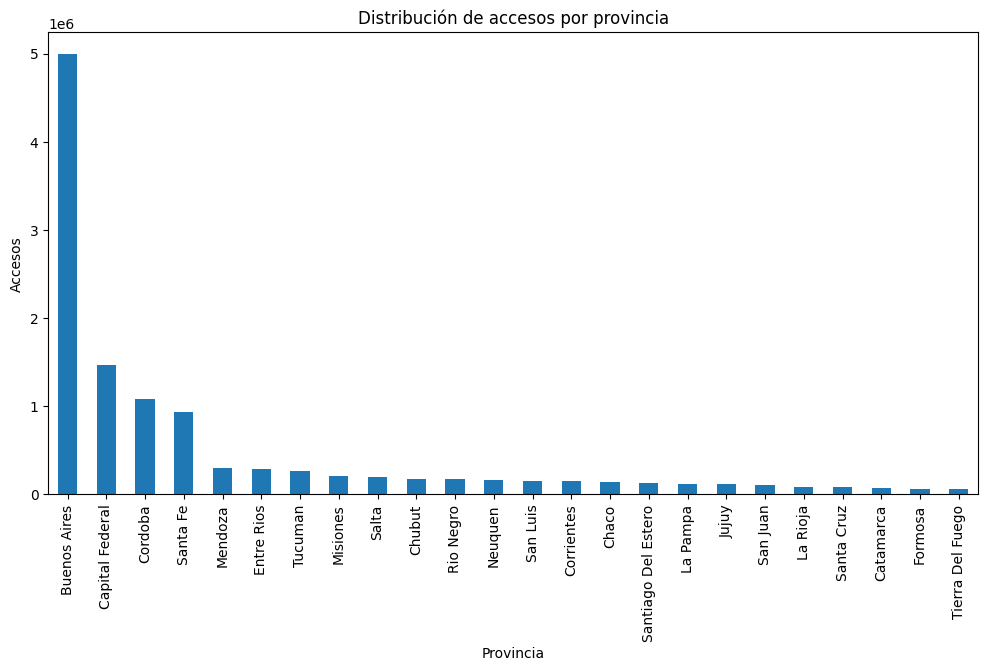

In [7]:
# Distribución de accesos por provincia
acc_provincia = acc_tec_localidad.groupby('Provincia')['Accesos'].sum().sort_values(ascending=False)
acc_provincia.plot(kind='bar', figsize=(12, 6), title='Distribución de accesos por provincia')
plt.ylabel('Accesos')
plt.show()


### Conclusiones

1. **Dominio de la Provincia de Buenos Aires**:
   - La Provincia de Buenos Aires concentra la mayor cantidad de accesos, superando ampliamente a todas las demás. Esto la posiciona como el mercado más grande y potencialmente más saturado.

2. **Relevancia de la Capital Federal, Córdoba y Santa Fe**:
   - Estas provincias ocupan el segundo, tercer y cuarto lugar en accesos respectivamente, mostrando una distribución significativa pero menor en comparación con Buenos Aires.

3. **Desigualdad Regional**:
   - Hay una marcada desigualdad en los accesos entre las provincias. Muchas provincias tienen niveles de accesos considerablemente bajos, como Formosa, Catamarca, Santa Cruz y Tierra del Fuego.

4. **Concentración del Mercado**:
   - Los accesos están altamente concentrados en unas pocas provincias (Buenos Aires, Capital Federal, Córdoba y Santa Fe), lo que puede indicar un desarrollo más avanzado de infraestructura en estas regiones.

---

### Observaciones

1. **Expansión en Provincias de Bajos Accesos**:
   - Provincias con pocos accesos, como Formosa, Catamarca y Tierra del Fuego, presentan oportunidades para incrementar la presencia de tecnologías modernas mediante inversiones estratégicas.

2. **Optimización en Mercados Saturados**:
   - En regiones como Buenos Aires y Capital Federal, donde los accesos son muy altos, es clave optimizar los servicios para fidelizar clientes y diferenciarse de la competencia.

3. **Foco en Provincias Intermedias**:
   - Provincias como Córdoba y Santa Fe, con accesos significativos pero no saturados, representan un equilibrio ideal para inversiones de mediano plazo.

4. **Reducción de la Brecha Digital**:
   - Las desigualdades en los accesos indican la necesidad de desarrollar infraestructura en provincias más relegadas, lo cual no solo tiene beneficios comerciales sino también sociales.


## 4. Accesos por tecnología y provincia
- Se crea una tabla cruzada para analizar cómo se distribuyen las tecnologías en cada provincia.
>Una *tabla cruzada*  muestra la distribución conjunta de dos o más variables categóricas o cuantitativas. Se utiliza para identificar relaciones, patrones o dependencias entre variables, facilitando el análisis comparativo y la toma de decisiones basadas en datos. Es especialmente útil para segmentar información y visualizar interacciones clave en conjuntos de datos complejos.

- Se intenta identificar provincias donde una tecnología específica predomina.

In [8]:
# Tabla cruzada de accesos
tabla_cruzada = acc_tec_localidad.pivot_table(values='Accesos', index='Provincia', columns='Tecnologia', aggfunc='sum', fill_value=0)
print(tabla_cruzada)

Tecnologia               ADSL  CABLEMODEM  DIAL UP  FIBRA OPTICA    OTROS  \
Provincia                                                                   
Buenos Aires         214055.0   2722466.0   5900.0     1849476.0  56102.0   
Capital Federal       54102.0   1144781.0   2050.0      230402.0  27704.0   
Catamarca              4951.0     10303.0      1.0       58355.0      1.0   
Chaco                  9448.0     57935.0      5.0       68944.0   2277.0   
Chubut                25955.0     80704.0    857.0       26516.0   8906.0   
Cordoba               93483.0    443091.0     63.0      477504.0   9305.0   
Corrientes            14849.0     86226.0      3.0       39792.0   5174.0   
Entre Rios            31335.0    158918.0     20.0       68540.0  11296.0   
Formosa                8488.0     18768.0      0.0       18977.0    234.0   
Jujuy                  9509.0     51361.0      0.0       53492.0   1127.0   
La Pampa               6778.0     58647.0    162.0       37226.0    868.0   

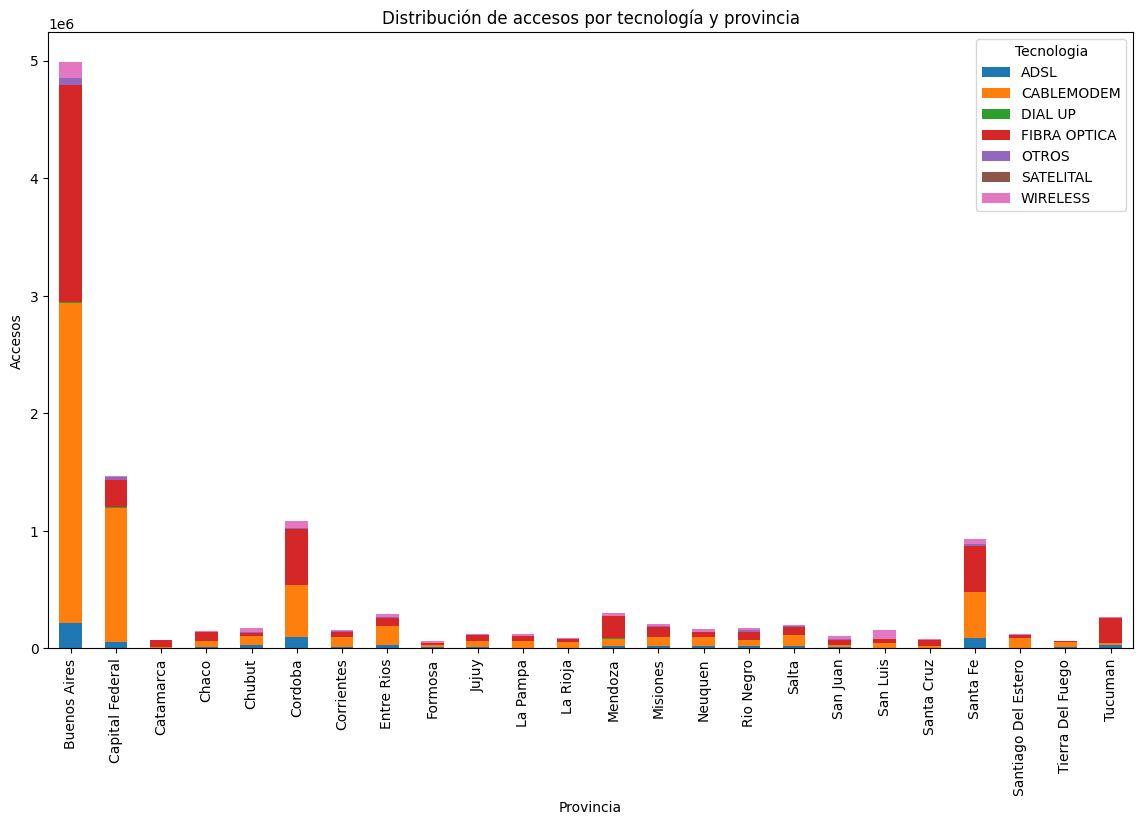

In [9]:
# Visualizar la distribución por provincia y tecnología
tabla_cruzada.plot(kind='bar', stacked=True, figsize=(14, 8), title='Distribución de accesos por tecnología y provincia')
plt.ylabel('Accesos')
plt.show()

### Conclusiones

1. **Dominio del Cablemodem y Fibra Óptica en Buenos Aires**:
   - La Provincia de Buenos Aires lidera ampliamente en accesos con un predominio de **Cablemodem** y **Fibra Óptica**, reflejando su mejor infraestructura tecnológica y alta demanda de servicios de banda ancha de calidad.

2. **Capital Federal: Alta Penetración de Fibra Óptica**:
   - En la Capital Federal, el **Cablemodem** sigue liderando, pero la **Fibra Óptica** tiene una participación significativa, reflejando una transición hacia tecnologías más modernas en zonas urbanas.

3. **Desigualdad Tecnológica Regional**:
   - Provincias con menores niveles de acceso como Catamarca, La Rioja, y Formosa dependen principalmente de tecnologías más antiguas o de menor capacidad como **ADSL** y **Wireless**, indicando brechas importantes en el acceso a infraestructura avanzada.

4. **Rol del Wireless y Tecnologías Marginales**:
   - En provincias con menor densidad poblacional como San Luis, La Pampa, y Chubut, **Wireless** tiene una mayor participación relativa, sugiriendo que estas tecnologías son clave en zonas rurales o de difícil acceso.

5. **Participación Reducida de Tecnologías Obsoletas**:
   - Tecnologías como **Dial Up** y **Satelital** tienen una presencia residual en todas las provincias, reflejando su obsolescencia en el contexto de tecnologías más modernas.

---

### Observaciones

1. **Expansión de Fibra Óptica**:
   - Invertir en infraestructura de **Fibra Óptica** en provincias como Córdoba, Santa Fe, y Mendoza, donde ya hay una base significativa de accesos pero aún espacio para crecimiento.

2. **Fortalecimiento de Wireless en Regiones Rurales**:
   - Provincias como La Pampa y San Luis muestran una dependencia del **Wireless**, lo que representa una oportunidad para mejorar y modernizar la infraestructura en estas áreas.

3. **Reducción de Brechas Regionales**:
   - Provincias como Catamarca, Formosa, y La Rioja tienen bajos niveles de acceso total y dependen de tecnologías más antiguas. Ampliar la infraestructura moderna en estas regiones podría generar un impacto significativo.

4. **Consolidación en Buenos Aires y Capital Federal**:
   - En mercados saturados como Buenos Aires y la Capital Federal, la estrategia debe enfocarse en servicios diferenciados y premium, especialmente en **Fibra Óptica**, para fidelizar clientes y maximizar ingresos.